### Pipeline Data
- Reduce the dimension of the feature space in such a way that new variables are orthogonal to each other
- Source code: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- **Target Variable = Genre**

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data
%store -r beats2
%store -r genre_strings

beats2.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genres
0,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,12
1,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,12
2,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,12
3,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,12
4,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,12


In [3]:
target_array = np.unique(genre_strings)
target_array

array(['Beat', 'Blues', 'Chill', 'Choir', 'Country', 'Dub', 'Electronic',
       'Folk', 'HipHop', 'House', 'Indie', 'Jazz', 'Metal', 'Pop', 'Punk',
       'Rap', 'Reggae', 'Rock', 'Trance', 'Trap'], dtype=object)

In [4]:
target_num_array = np.unique(beats2['Genres'])
target_num_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int8)

## Part 2: Learning
- Model Selection
    - Cross-Validation
    - Performance Metrics
    - Hyperparameter Optimization

In [5]:
# Separate out the features
X = beats2.copy().drop(columns='Genres')

# Separate out the target
y = beats2['Genres'].values

#### Testing and Training Data

In [6]:
# Import necessary modules 
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(55699, 23872, 55699, 23872)

#### Standardize the Feature Data

In [8]:
# Import necessary modules
from sklearn.preprocessing import StandardScaler

In [9]:
# Create a scaler instance
scaler = StandardScaler()

In [10]:
# Fit on training features set *only*
scaler.fit(X_train)

# Apply transform to both the feature training and the test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Create a PCA instance

In [11]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
# Make an instance of the Model
ml_pca = PCA(n_components=2)

In [13]:
# Map (transform) to both the training set and the test set
X_train_scal_pca = ml_pca.fit_transform(X_train_scaled)
X_test_scal_pca = ml_pca.transform(X_test_scaled)

In [14]:
# Determine number of components in model
ml_pca.n_components_ 

2

In [15]:
# Define variable for variance - weights of PCA1 and PCA2
explained_pca = ml_pca.explained_variance_ratio_
pca1 = explained_pca[0]
pca2 = explained_pca[1]

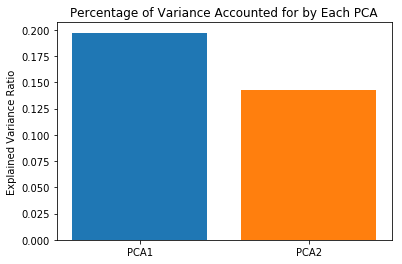

In [16]:
# View bar plot
fig, ax = plt.subplots()
x = np.arange(2)
pl1 = plt.bar(x=0, height=pca1)
pl2 = plt.bar(x=1, height=pca2)

# Define labels
plt.title('Percentage of Variance Accounted for by Each PCA')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(0, 2, 1), ('PCA1', 'PCA2'))
plt.show()

*Observations*: The 2 PCA analysis shows that the top components have low variance rations (~20% and ~13%, respectively).

#### Apply Logistic Regression to the Transformed Data

In [29]:
# Import necessary modules
%run gradient_logistic_regression.ipynb

In [33]:
# Create a logistic regression instance that uses gradient descent
log_reg_gd = LogisticRegressionGD(eta=0.5, n_iter=1000, random_state=42)

TypeError: LogisticRegressionGD() takes no arguments

In [56]:
# Fit model to data
log_reg.fit(X_train_scal_pca, y_train)

BlockingIOError: [Errno 35] Resource temporarily unavailable

In [291]:
# Create combined variables for plotting
X_combined = np.vstack((X_train_scal_pca, X_test_scal_pca))
y_combined = np.hstack((y_train, y_test))

#### Visualize the Decision Boundaries

In [287]:
# Import necessary modules
from matplotlib.colors import ListedColormap

In [276]:
# Create a General Plot Decision Regions
# Motification of original source code from'Python Machine Learning' textbook 
# Chapter: 'Training Simple Machine Learning Algorithms for Classigication', pg. 32

def plot_decision_regions(X, y, classifier, resolution=0.2):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        x=X[y == cl, 0]
        y=X[y == cl, 1]
        return x.size, y.size
        plt.scatter(x,y,
                    alpha=0.6,
                    c=colors[idx],
                    marker=markers[idx],
                    label=c1,
                    edgecolor='black')

Text(0.5, 1.0, 'Logistic Regression of Music Genres based on PCA of Audio Features')

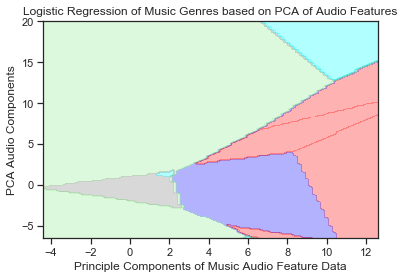

In [292]:
# Plot decision regions
plot_decision_regions(X_combined, y_combined, classifier=log_reg)
plt.ylabel('PCA Audio Components')
plt.xlabel('Principle Components of Music Audio Feature Data')
plt.title('Logistic Regression of Music Genres based on PCA of Audio Features')

In [293]:
# Predict for One Observation
print(log_reg.predict(X_test_scal_pca[0].reshape(1,-1)))

# Predict for One Observation
log_reg.predict(X_test_scal_pca[0:10])

[13]


array([13, 12, 13, 13, 13,  7, 13, 13, 13, 13], dtype=int8)

In [294]:
# Get rough estimate of model accuracy score
log_reg.score(X_test_scal_pca, y_test)

0.24970676943699732

#### Decision Tree Classifier

In [146]:
# Import necessary modules
from sklearn.tree import DecisionTreeClassifier

In [295]:
# Create a tree instance
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Fit data to tree
tree.fit(X_train_scal_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Text(0.5, 1.0, 'Decision Tree Classifier into Genres based on PCA Music Audio Features')

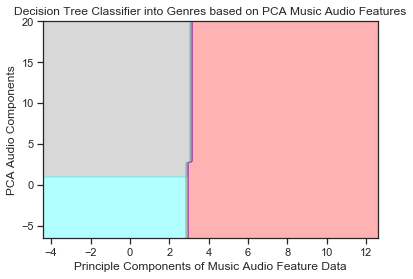

In [296]:
# Plot decision regions
plot_decision_regions(X_combined, y_combined, classifier=tree)
plt.ylabel('PCA Audio Components')
plt.xlabel('Principle Components of Music Audio Feature Data')
plt.title('Decision Tree Classifier into Genres based on PCA Music Audio Features')

In [297]:
# Predict for One Observation
print(tree.predict(X_test_scal_pca[0].reshape(1,-1)))

# Predict for One Observation
tree.predict(X_test_scal_pca[0:10])

[13]


array([13, 12, 13, 13, 13,  7, 13, 13, 13, 13], dtype=int8)

In [ ]:
#(precision, recall, F1 Score, ROC Curve, etc would be better)

In [305]:
# Import necessary modules
from sklearn.metrics import roc_curve

In [308]:
# Predict
prediction = tree.predict(X_test_scal_pca)
prediction

array([13, 12, 13, ..., 13, 13,  7], dtype=int8)

In [313]:
# Get rough estimate of model accuracy score
train_score = tree.score(X_train_scal_pca, y_train)
test_score = tree.score(X_test_scal_pca, y_test)
train_score, test_score

(0.2531643297007128, 0.24212466487935658)

In [ ]:
# Computing false and true positive rates
false_pr, true_pr, _ = roc_curve(prediction, , drop_intermediate=False)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()